#Model for Nashik House Price Prediction

##Loading Dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
house_data = pd.read_csv('/content/drive/MyDrive/Data for ML(rough)/final_nashik_data.csv')
house_data

,BHK,price,per_month_emi,total_sqft,latitude,longitude
0,3.0,75.00,39.72,1550,19.987960,73.787390
1,2.0,41.00,21.71,1000,19.982460,73.811840
2,2.0,53.35,28.25,970,19.975850,73.788750
3,2.0,55.00,29.13,1000,19.930532,73.811734
4,2.0,27.00,14.30,853,19.955310,73.840890
...,...,...,...,...,...,...
5491,4.0,92.25,45.80,0,19.951040,73.756990
5492,2.0,0.00,0.00,0,20.031780,73.855100
5493,2.0,34.32,18.17,0,20.049050,73.796960
5494,0.0,0.00,0.00,0,20.027090,73.821100


##Data Preparation


###Data separation into X and Y

####For Y

In [8]:
y = house_data['price']
y

,price
0,75.00
1,41.00
2,53.35
3,55.00
4,27.00
...,...
5491,92.25
5492,0.00
5493,34.32
5494,0.00


####For X


In [9]:
x = house_data.drop('price', axis=1)
x

,BHK,per_month_emi,total_sqft,latitude,longitude
0,3.0,39.72,1550,19.987960,73.787390
1,2.0,21.71,1000,19.982460,73.811840
2,2.0,28.25,970,19.975850,73.788750
3,2.0,29.13,1000,19.930532,73.811734
4,2.0,14.30,853,19.955310,73.840890
...,...,...,...,...,...
5491,4.0,45.80,0,19.951040,73.756990
5492,2.0,0.00,0,20.031780,73.855100
5493,2.0,18.17,0,20.049050,73.796960
5494,0.0,0.00,0,20.027090,73.821100


##Splitting the data into trainning set and testing set

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=80)

##Model Building -> Linear Regression


###Trainning the Model

In [11]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

###Applying the model to make prediction

In [12]:
y_lr_train_pred = lr_model.predict(x_train)
y_lr_test_pred = lr_model.predict(x_test)

In [13]:
y_lr_train_pred

array([ 27.54322529, 120.30326965,  22.09716636, ...,  16.73931041,
        54.45987868,  57.85231885])

In [14]:
y_lr_test_pred

array([57.8693526 , 48.33366289, 12.86429802, ..., 57.8537793 ,
       17.38693403, 49.32551532])

###Evaluate the model performance or accuracy

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)

In [16]:
lr_result = pd.DataFrame(['Linear Regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_result.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [17]:
lr_result

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,105994.93569,0.012044,3239.482774,-0.347429


In [18]:
import numpy as np
print(np.mean(y_test - y_lr_test_pred)**2)

207.71361672324252


##Data Visualization of predicted results

[]

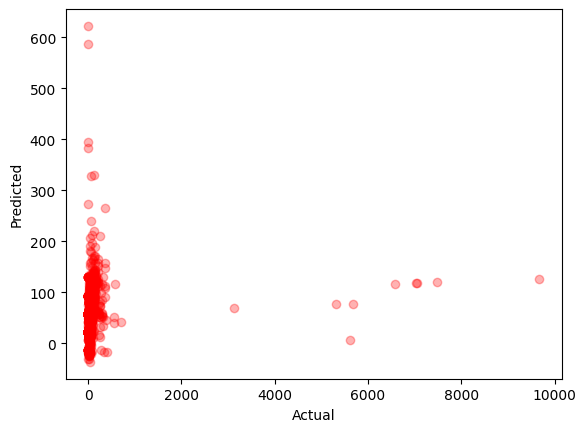

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x=y_train,y=y_lr_train_pred,c="#FF0000",alpha=0.3)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.plot()